In [ ]:
"""
Sprint2 of final project - srikanth

"""


import pandas as pd   
import numpy as np



 # data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine


# import necessary libraries
import pandas as pd
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AI/stores"

csv_files = glob.glob(os.path.join(path, "*.csv"))

print(path)

/content/drive/MyDrive/AI/stores


In [ ]:
# data01=pd.read_csv('stores/store_01_copy.csv')
# # print(data01.head())
# print(data01.shape)

# data02=pd.read_csv('stores/store_02_copy.csv')
# # print(data02.head())
# print(data02.shape)
# # dfz_new= pd.merge(data01, data02)
# dfz_new = dfz_new.append(data01,data02, ignore_index=True)
# dfz_new.shape

In [ ]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "/content/drive/MyDrive/AI/stores"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['store_02_copy.csv',
 'store_03_copy.csv',
 'store_04_copy.csv',
 'store_08_copy.csv',
 'store_05_copy.csv',
 'store_09_copy.csv',
 'store_06_copy.csv',
 'store_10_copy.csv',
 'store_07_copy.csv',
 'store_11_35_copy.csv',
 'store_01_copy.csv']

In [ ]:
df_append = pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv("/content/drive/MyDrive/AI/stores/"+file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append ## combined dataset:-



,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,2,2/5/2010,False,40.19,2.572,NaN,NaN,NaN,NaN,210.752605,7.057
1,2,2/12/2010,True,38.49,2.548,NaN,NaN,NaN,NaN,210.897994,7.057
2,2,2/19/2010,False,39.69,2.514,NaN,NaN,NaN,NaN,210.945160,7.057
3,2,2/26/2010,False,46.10,2.561,NaN,NaN,NaN,NaN,210.975957,7.057
4,2,3/5/2010,False,47.17,2.625,NaN,NaN,NaN,NaN,211.006754,6.891
...,...,...,...,...,...,...,...,...,...,...,...
6365,1,6/28/2013,False,83.94,3.495,4205.98,796.70,6.84,3816.78,NaN,7.057
6366,1,7/5/2013,False,79.85,3.422,7649.99,3503.29,1766.77,9454.96,NaN,7.057
6367,1,7/12/2013,False,83.12,3.400,6089.94,1362.42,209.62,2367.42,NaN,7.057
6368,1,7/19/2013,False,79.26,3.556,3117.04,1060.39,199.05,1012.30,NaN,7.057


    1. Design a prediction model to forecast the weekly sales across first ten stores and use the same model to make predictions for store_11_35. There are external variables such as gas price, holidays, unemployment, and temperature for the given dataset. Evaluate the impact of these external variables on the accuracy of the model (do they help improve the accuracy?). Plot the relevant graphs. 

In [ ]:
df_append['Store'].value_counts()
## taking only the first ten stores for designing the prediction model:-
df_train=df_append.loc[df_append['Store']<11]
# df_train['Store'].value_counts()
# df_train.shape
# df_train.loc[df_train['Store']==10].tail()
# df_train.tail()
df_train

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,2,2/5/2010,False,40.19,2.572,NaN,NaN,NaN,NaN,210.752605,7.057
1,2,2/12/2010,True,38.49,2.548,NaN,NaN,NaN,NaN,210.897994,7.057
2,2,2/19/2010,False,39.69,2.514,NaN,NaN,NaN,NaN,210.945160,7.057
3,2,2/26/2010,False,46.10,2.561,NaN,NaN,NaN,NaN,210.975957,7.057
4,2,3/5/2010,False,47.17,2.625,NaN,NaN,NaN,NaN,211.006754,6.891
...,...,...,...,...,...,...,...,...,...,...,...
6365,1,6/28/2013,False,83.94,3.495,4205.98,796.70,6.84,3816.78,NaN,7.057
6366,1,7/5/2013,False,79.85,3.422,7649.99,3503.29,1766.77,9454.96,NaN,7.057
6367,1,7/12/2013,False,83.12,3.400,6089.94,1362.42,209.62,2367.42,NaN,7.057
6368,1,7/19/2013,False,79.26,3.556,3117.04,1060.39,199.05,1012.30,NaN,7.057


In [ ]:
s1=pd.read_csv("/content/drive/MyDrive/AI/"+'train.csv')
s1.head()
# s1.shape
s1.tail()
print(s1.shape)
# print(s1['Store'].value_counts())

s1=s1.loc[s1['Store']<11]
s1.shape
print(s1['Store'].value_counts())
s1.tail()


(421570, 5)
10    10315
4     10272
1     10244
2     10238
6     10211
8      9895
7      9762
3      9036
5      8999
9      8867
Name: Store, dtype: int64


,Store,Dept,Date,Weekly_Sales,IsHoliday
97834,10,98,2012-09-28,22.34,False
97835,10,98,2012-10-05,789.38,False
97836,10,98,2012-10-12,477.24,False
97837,10,98,2012-10-19,578.46,False
97838,10,98,2012-10-26,560.02,False



could not be merged with the train.csv dataset; since the datas are given till 2012; whereas; all the data from the stores go till 2013.

In [ ]:
# s1_new=s1.loc[s1['Date']<='']

In [ ]:
# s2=pd.read_csv('test.csv')
# s2.head()

## Preparing The Dataset

In [ ]:
df_train.head()

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,2,2/5/2010,False,40.19,2.572,NaN,NaN,NaN,NaN,210.752605,7.057
1,2,2/12/2010,True,38.49,2.548,NaN,NaN,NaN,NaN,210.897994,7.057
2,2,2/19/2010,False,39.69,2.514,NaN,NaN,NaN,NaN,210.945160,7.057
3,2,2/26/2010,False,46.10,2.561,NaN,NaN,NaN,NaN,210.975957,7.057
4,2,3/5/2010,False,47.17,2.625,NaN,NaN,NaN,NaN,211.006754,6.891


In [ ]:
df_train.isna().sum()

Store                       0
Date                        0
IsHoliday                   0
Temperature                 0
gas_price                   0
discount_promotional      842
discount_clearance       1059
discount_damaged_good     908
discount_competitive      862
CPI                       143
Unemployment              130
dtype: int64

In [ ]:
mean_value_1=df_train['discount_promotional'].mean()
df_train['discount_promotional'].fillna(value=mean_value_1, inplace=True)

mean_value_2=df_train['discount_clearance'].mean()
df_train['discount_clearance'].fillna(value=mean_value_2, inplace=True)

mean_value_3=df_train['discount_damaged_good'].mean()
df_train['discount_damaged_good'].fillna(value=mean_value_3, inplace=True)

mean_value_4=df_train['Unemployment'].mean()
df_train['Unemployment'].fillna(value=mean_value_4, inplace=True)

mean_value_5=df_train['discount_competitive'].mean()
df_train['discount_competitive'].fillna(value=mean_value_5, inplace=True)

mean_value_6=df_train['CPI'].mean()
df_train['CPI'].fillna(value=mean_value_6, inplace=True)

mean_value_7=df_train['CPI_converted'].mean()
df_train['CPI_converted'].fillna(value=mean_value_7, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_train.isna().sum()

Store                    0
Date                     0
IsHoliday                0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Unemployment             0
dtype: int64

In [ ]:
df_train['Store'].value_counts()

2     182
3     182
4     182
8     182
5     182
9     182
6     182
10    182
7     182
1     182
Name: Store, dtype: int64

In [ ]:
# df_train1=df_train.loc[df_train['Date']<='10/26/2012']
# df_train1.tail()

calculation of CPI:-
    # https://www.uvm.edu/~awoolf/classes/spring2005/ec11/calculating_inflation.html

In [ ]:


initial=131.193097
df_train['CPI_converted']=df_train['CPI']/initial * 100
df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,CPI_converted
0,2,2/5/2010,False,40.19,2.572,6819.891074,3051.464389,1823.168202,2585.597265,210.752605,7.057,160.643060
1,2,2/12/2010,True,38.49,2.548,6819.891074,3051.464389,1823.168202,2585.597265,210.897994,7.057,160.753880
2,2,2/19/2010,False,39.69,2.514,6819.891074,3051.464389,1823.168202,2585.597265,210.945160,7.057,160.789832
3,2,2/26/2010,False,46.10,2.561,6819.891074,3051.464389,1823.168202,2585.597265,210.975957,7.057,160.813307
4,2,3/5/2010,False,47.17,2.625,6819.891074,3051.464389,1823.168202,2585.597265,211.006754,6.891,160.836781
...,...,...,...,...,...,...,...,...,...,...,...,...
6365,1,6/28/2013,False,83.94,3.495,4205.980000,796.700000,6.840000,3816.780000,198.850394,7.057,151.570775
6366,1,7/5/2013,False,79.85,3.422,7649.990000,3503.290000,1766.770000,9454.960000,198.850394,7.057,151.570775
6367,1,7/12/2013,False,83.12,3.400,6089.940000,1362.420000,209.620000,2367.420000,198.850394,7.057,151.570775
6368,1,7/19/2013,False,79.26,3.556,3117.040000,1060.390000,199.050000,1012.300000,198.850394,7.057,151.570775


In [ ]:
df_train.columns

Index(['Store', 'Date', 'IsHoliday', 'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive', 'CPI', 'Unemployment', 'CPI_converted'],
      dtype='object')

In [ ]:
# Independent and dependent variables:-
X=df_train[['Store', 'IsHoliday', 'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive',  'Unemployment',]]
# X=df_train[['Store', 'IsHoliday', 'Temperature', 'gas_price',  'Unemployment',]]
y=df_train[['CPI_converted']]

In [ ]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

Begin with Linear regression model to forecast the weekly sales using the given features.

In [ ]:
## Linear Regression:-
 ## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [ ]:
regression.plot()

AttributeError: ignored

In [ ]:
# mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
# np.mean(mse)

In [ ]:
# ##prediction 
# reg_pred=regression.predict(X_test)

In [ ]:
# reg_pred

In [ ]:
# import seaborn as sns
# sns.displot(reg_pred-y_test,kind='kde')

In [ ]:
# from sklearn.metrics import r2_score

In [ ]:
# score=r2_score(reg_pred,y_test)

In [ ]:
# score

##  NEW ALTERNATIVE METHOD

In [ ]:
ai_path = "/content/drive/MyDrive/AI/"
abc=pd.read_csv(ai_path+"train.csv")
abc

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
abc['sales_diff']=abc['Weekly_Sales'].diff()
abc=abc.fillna(0)
abc

,Store,Dept,Date,Weekly_Sales,IsHoliday,sales_diff
0,1,1,2010-02-05,24924.50,False,0.00
1,1,1,2010-02-12,46039.49,True,21114.99
2,1,1,2010-02-19,41595.55,False,-4443.94
3,1,1,2010-02-26,19403.54,False,-22192.01
4,1,1,2010-03-05,21827.90,False,2424.36
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,41.07
421566,45,98,2012-10-05,628.10,False,119.73
421567,45,98,2012-10-12,1061.02,False,432.92
421568,45,98,2012-10-19,760.01,False,-301.01


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,5))
# plt.plot(abc['Date'],abc['Weekly_Sales'])
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title("Weekly Sales")
# plt.show()

In [ ]:
abc.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
sales_diff      0
dtype: int64

In [ ]:
# type(abc['Date'][0])

In [ ]:
# abc[['Date']] = abc[['Date']].apply(pd.to_datetime)
# abc['Date'] = (abc['Date'] - abc['Date'][0]).dt.days
# abc

In [ ]:
abc_train=abc.loc[abc['Store']<11]
abc_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,sales_diff
0,1,1,2010-02-05,24924.50,False,0.00
1,1,1,2010-02-12,46039.49,True,21114.99
2,1,1,2010-02-19,41595.55,False,-4443.94
3,1,1,2010-02-26,19403.54,False,-22192.01
4,1,1,2010-03-05,21827.90,False,2424.36
...,...,...,...,...,...,...
97834,10,98,2012-09-28,22.34,False,-318.44
97835,10,98,2012-10-05,789.38,False,767.04
97836,10,98,2012-10-12,477.24,False,-312.14
97837,10,98,2012-10-19,578.46,False,101.22


In [ ]:
abc_test=abc.loc[abc['Store']>11]
abc_test

,Store,Dept,Date,Weekly_Sales,IsHoliday,sales_diff
107901,12,1,2010-02-05,17426.75,False,17356.75
107902,12,1,2010-02-12,37734.82,True,20308.07
107903,12,1,2010-02-19,22135.29,False,-15599.53
107904,12,1,2010-02-26,14942.21,False,-7193.08
107905,12,1,2010-03-05,17098.49,False,2156.28
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,41.07
421566,45,98,2012-10-05,628.10,False,119.73
421567,45,98,2012-10-12,1061.02,False,432.92
421568,45,98,2012-10-19,760.01,False,-301.01


In [ ]:
# train=abc_new[]
# test=
print("Train data shape:- ",abc_train.shape)
print("Test Data Shape:-",abc_test.shape)

Train data shape:-  (97839, 6)
Test Data Shape:- (313669, 6)


doing this for abc_train:-

In [ ]:
abc_new=abc_train[['sales_diff','Weekly_Sales']]
abc_new['sales_diff'][0]=abc_new['Weekly_Sales'][0]
abc_new=abc_new[['sales_diff']]
abc_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sales_diff
0,24924.50
1,21114.99
2,-4443.94
3,-22192.01
4,2424.36
...,...
97834,-318.44
97835,767.04
97836,-312.14
97837,101.22


In [ ]:
for i in range(1,100):#97839
    col_name='week_'+str(i)
    abc_new[col_name]=abc_new['sales_diff'].shift(i)
abc_new=abc_new.fillna(0)
abc_new.head()
abc_new_train=abc_new
abc_new_train.head()

,sales_diff,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_90,week_91,week_92,week_93,week_94,week_95,week_96,week_97,week_98,week_99
0,24924.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21114.99,24924.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4443.94,21114.99,24924.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-22192.01,-4443.94,21114.99,24924.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2424.36,-22192.01,-4443.94,21114.99,24924.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


for abc_test:- data:- 

In [ ]:
abc_new=abc_test[['sales_diff','Weekly_Sales']]
# abc_new['sales_diff'][0]=abc_new['Weekly_Sales'][0]
abc_new=abc_new[['sales_diff']]
abc_new

,sales_diff
107901,17356.75
107902,20308.07
107903,-15599.53
107904,-7193.08
107905,2156.28
...,...
421565,41.07
421566,119.73
421567,432.92
421568,-301.01


In [ ]:
for i in range(1,100):#313669
    col_name='week_'+str(i)
    abc_new[col_name]=abc_new['sales_diff'].shift(i)
abc_new=abc_new.fillna(0)
abc_new.head()
abc_new_test=abc_new
abc_new_test

,sales_diff,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_90,week_91,week_92,week_93,week_94,week_95,week_96,week_97,week_98,week_99
107901,17356.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107902,20308.07,17356.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107903,-15599.53,20308.07,17356.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107904,-7193.08,-15599.53,20308.07,17356.75,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107905,2156.28,-7193.08,-15599.53,20308.07,17356.75,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,41.07,-138.66,253.52,6.40,-69.36,-84.76,-227.33,211.03,-141.17,-187.67,...,47.95,-147.93,0.00,-443.48,316.58,14.05,112.69,163.18,18.98,-261.50
421566,119.73,41.07,-138.66,253.52,6.40,-69.36,-84.76,-227.33,211.03,-141.17,...,-80.50,47.95,-147.93,0.00,-443.48,316.58,14.05,112.69,163.18,18.98
421567,432.92,119.73,41.07,-138.66,253.52,6.40,-69.36,-84.76,-227.33,211.03,...,-40.00,-80.50,47.95,-147.93,0.00,-443.48,316.58,14.05,112.69,163.18
421568,-301.01,432.92,119.73,41.07,-138.66,253.52,6.40,-69.36,-84.76,-227.33,...,75.00,-40.00,-80.50,47.95,-147.93,0.00,-443.48,316.58,14.05,112.69


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(abc_new_train)
abc_new_train=scaler.transform(abc_new_train)
abc_new_test=scaler.transform(abc_new_test)

In [ ]:
X_train,y_train = abc_new_train[:,1:], abc_new_train[:,0:1]
X_test,y_test = abc_new_test[:,1:], abc_new_test[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
# y_train=abc_train[['sales_diff']]
# X_train=abc_train[['Store','Dept','Date','IsHoliday','Weekly_Sales']]

In [ ]:
# y_test=abc_test[['sales_diff']]
# X_test=abc_test[['Store','Dept','Date','IsHoliday','Weekly_Sales']]

In [ ]:
# X=abc_train
# y=abc_test

In [ ]:
# ## train test split 
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, random_state=42)

Begin with Linear regression model to forecast the weekly sales using the given features.

In [ ]:
# ## Linear Regression:-
#  ## standardizing the dataset
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
'''
https://www.youtube.com/watch?v=20fbgWm5M2o
done till 40 mins.
'''

'\nhttps://www.youtube.com/watch?v=20fbgWm5M2o\ndone till 40 mins.\n'

In [ ]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
np.mean(mse)

-0.00015291688922897535

In [ ]:
##prediction 
reg_pred=regression.predict(X_test)

In [ ]:
reg_pred

array([-0.08440794, -0.0982188 , -0.10929362, ..., -0.08414746,
       -0.08482318, -0.08422361])

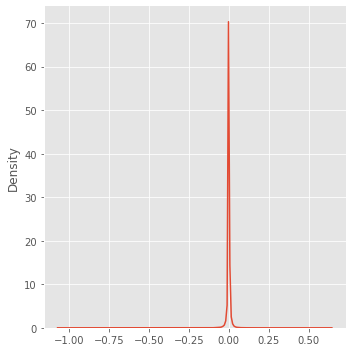

In [ ]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:
score

-1.0166573534636942

In [ ]:
#Ridge Regression Algorithm

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 1}


In [ ]:
print(ridgecv.best_score_)

-0.00015348721192439964


In [ ]:
ridge_pred=ridgecv.predict(X_test)

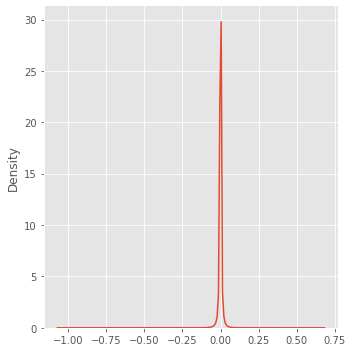

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [ ]:
score=r2_score(ridge_pred,y_test)
score

-1.285963970712697

In [ ]:
## XGBoost:-

In [ ]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

#or we can try with:-
score=r2_score(pred,y_test)
score

[21:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


NameError: ignored

In [ ]:
# #ARIMA:-
# from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(train['AvgTemp'],order=(1,0,5))
# model=model.fit()
# model.summary()


In [ ]:
# start=len(train)
# end=len(train)+len(test)-1
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# test['AvgTemp'].plot(legend=True)

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# test['AvgTemp'].mean()
# rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
# print(rmse)

In [ ]:
"""

import statsmodels

from statsmodels.tsa.stattools import acf,pacf
lag_acf= acf(abc_new_train,nlags=10)
lag_pacf= pacf(abc_new_train,nlags=10)

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(abc_new_train, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)

ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues, copy=True)
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()

ARIMA_log_prediction = pd.Series(abc_new_test.iloc[0],index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_log_predictions_cumsum,fill_value=0)

print("rsme",np.sqrt(sum((predictions_ARIMA - abc_new_test)**2)/len(abc_new_test)))
"""

In [ ]:
## Ensemble models ::__----

In [ ]:
import pandas as pd
stores=pd.read_csv(ai_path+'stores.csv')
stores.head()

In [ ]:
df_train.head() # contains the first ten stores.
df_train#.loc[df_train['Store']==2]
# df_train.shape

therefore; we are only merging becuase we will be using the df_train + Size columns from the stores dataset as training dataset  and the Type and  columns from the stores dataset as the validation./,,prediction values..!!..,,,,;;;;;;;;

In [ ]:
merged=df_train.merge(stores[['Store','Size','Type']], on='Store')#.head()#(40)
merged

In [ ]:
# merged.loc[merged['Store']==3]
merged.isna().sum()

In [ ]:
merged=merged.fillna(0)

In [ ]:
# merged.loc[merged['Store']==3]
merged.isna().sum()

In [ ]:
# merged.drop['Date']
merged.columns
merged=merged[['Store', 'IsHoliday', 'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive', 'CPI', 'Unemployment', 'Size','Type']]


In [ ]:
# merged.loc[merged['Store']==1]
merged.shape

In [ ]:
#define the predictor and target variables
x = merged[['Store',  'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive', 'CPI', 'Unemployment', 'Size']]
y = merged['Type']

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier()
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(xtrain,ytrain)
ytest_pred=bag_model.predict(xtest)
print(bag_model.score(xtest, ytest))

In [ ]:
#BaggingClassifier(dtc, n_estimators= 10 (or 20, 30, 40, 50))

In [ ]:
## Deep LEarning part ; using ANN's:-

In [ ]:
## Encoding Categorical Variable IsHoliday.,;;::--
#Encoding Categorical Variable IsHoliday:-
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
merged['IsHoliday'] = labelencoder.fit_transform(merged['IsHoliday'])
merged

In [ ]:
#Generating Matrix of Features (X) and (Y) Features:-
#define the predictor and target variables
X = merged[['Store','IsHoliday',  'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'discount_competitive', 'CPI', 'Unemployment', 'Size']]
Y = merged['Type']

In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
##Performing Feature Scaling
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Initialising ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="softmax"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
#ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

In [ ]:
#Predicting result for Single Observation
#print(ann.predict(sc.transform(X_test)) > Y_test)

dataset 2:-

In [ ]:
##ARIMA:-
df_train=pd.read_csv('CECS551_dataset_02/data_train.csv')
df_train

In [ ]:
price=pd.read_csv('CECS551_dataset_02/price.csv')
price

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
plt.xlabel('store_id')
plt.ylabel('sell_price')
plt.plot(price)

In [ ]:
result = adfuller(price['sell_price'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
df_log = np.log(price)
plt.plot(df_log)

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

In [ ]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [ ]:
results.plot_predict(1,264)

In [ ]:
## k means:-

In [ ]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_train)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_train)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_train[:,0], X_train[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_train[:,1], y = X_train[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_train[:,2], y = X_train[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [ ]:
##k-means:

In [ ]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X = X_train, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_train, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_train[:, x], X_train[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_train[:, x], X_train[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [ ]:
x_data = ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(22, 80, 57, 0.5)', 'rgba(127, 65, 14, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
cutoff_quantile = 95

for n_clusters in range(3,K_best+1,2):
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 3):
        field_to_plot = features[fild]        
        y_data = list()
        ymax = 0
        for i in np.arange(0,n_clusters):
            y0 = customer_history_df[customer_history_df[cl]==i][field_to_plot].values
            y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
            if ymax < max(y0): ymax = max(y0)
            y_data.insert(i, y0)

        traces = []

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
                traces.append(go.Box(y=yd, name=xd, boxpoints=False, jitter=0.5, whiskerwidth=0.2, fillcolor=cls,
                    marker=dict( size=1, ),
                    line=dict(width=1),
                ))

        layout = go.Layout(
            title='Difference in {} with {} Clusters and {:1.2f} Score'.\
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']),
            yaxis=dict( autorange=True, showgrid=True, zeroline=True,
                dtick = int(ymax/10),
                gridcolor='black', gridwidth=0.1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ),
            margin=dict(l=40, r=30, b=50, t=50, ),
            paper_bgcolor='white',
            plot_bgcolor='white',
            showlegend=False
        )

        fig = go.Figure(data=traces, layout=layout)
        py.offline.iplot(fig)